## Observations and Insights 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
# Checking the number of mice.
mouse_groupby = merged_data.groupby("Mouse ID")
len(mouse_groupby)

249

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_data.drop( merged_data[merged_data["Mouse ID"] == "g989"].index, inplace=True)

In [23]:
# Checking the number of mice in the clean DataFrame.
mouse_count = merged_data.groupby("Mouse ID")
len(mouse_count)

248

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_mean = merged_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_median = merged_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_std = merged_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_var = merged_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_sem = merged_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_summary=pd.DataFrame(tumor_mean)
tumor_summary["Tumor Volume Median"] = tumor_median
tumor_summary["Tumor Volume Standard Deviation"] = tumor_std
tumor_summary["Tumor Volume Variance"] = tumor_var
tumor_summary["Tumor Volume Standard Error"] = tumor_sem
tumor_summary=tumor_summary.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Mean",})
tumor_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Standard Deviation,Tumor Volume Variance,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

NameError: name 'Text' is not defined

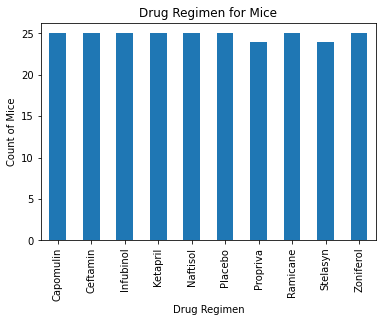

In [57]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_pd = merged_data.groupby("Drug Regimen").nunique()["Mouse ID"]
bar_pd = bar_pd.plot.bar(title = "Drug Regimen for Mice")

#labels
bar_pd.set_xlabel("Drug Regimen")
bar_pd.set_ylabel("Count of Mice")
Text(0, 1, "Count of Mice")

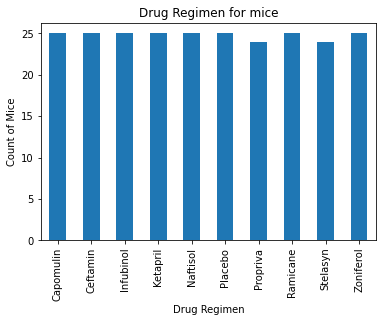

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

bar_plt = merged_data.groupby("Drug Regimen").nunique()["Mouse ID"]
bar_plt = pd.DataFrame(bar_plt)
bar_plt.plot.bar(legend = False)

#labels
plt.title("Drug Regimen for mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice")
plt.show()

<AxesSubplot:title={'center':'Male vs Female of mice'}, ylabel='Mouse ID'>

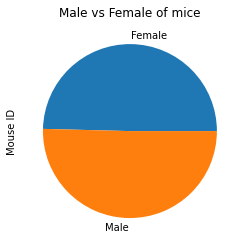

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie_pd=merged_data.groupby("Sex").nunique()["Mouse ID"]
pie_pd.plot.pie(title = "Male vs Female of mice")

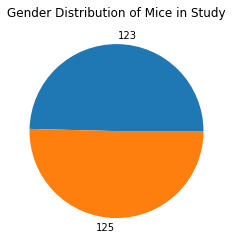

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_plt = merged_data.groupby("Sex").nunique()["Mouse ID"]
pie_plt_df = pd.DataFrame(pie_plt)
plt.pie(pie_plt, labels = pie_plt)
plt.title("Gender Distribution of Mice in Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_data = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]
capomulin = capomulin_data["Tumor Volume (mm3)"]

capomulin_q = capomulin.quantile([.25,.75])
capomulin_q1 = capomulin_q[.25]
capomulin_q3 = capomulin_q[.75]
capomulin_qIQR = capomulin_q3 - capomulin_q1
capomulin_LB = capomulin_q1 - (capomulin_qIQR * 1.5)
capomulin_UB = capomulin_q3 + (capomulin_qIQR * 1.5)

capomulin_summary = pd.DataFrame({
    "Capomulin Quartile 1" : [capomulin_q1],
    "Capomulin Quartile 3" : [capomulin_q3],
    "Capomulin IQR" : [capomulin_qIQR],
    "Capomulin Lower Bounds" : [capomulin_LB],
    "Capomulin Upper Bounds" : [capomulin_UB]
})

capomulin_summary

,Capomulin Quartile 1,Capomulin Quartile 3,Capomulin IQR,Capomulin Lower Bounds,Capomulin Upper Bounds
0,37.685933,45.0,7.314067,26.714832,55.971101


In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
infubinol_data = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]
infubinol = infubinol_data["Tumor Volume (mm3)"]

infubinol_q = infubinol.quantile([.25,.75])
infubinol_q1 = infubinol_q[.25]
infubinol_q3 = infubinol_q[.75]
infubinol_qIQR = infubinol_q3 - infubinol_q1
infubinol_LB = infubinol_q1 - (infubinol_qIQR * 1.5)
infubinol_UB = infubinol_q3 + (infubinol_qIQR * 1.5)

infubinol_summary = pd.DataFrame({
    "INfubinol Quartile 1" : [infubinol_q1],
    "Infubinol Quartile 3" : [infubinol_q3],
    "Infubinol IQR" : [infubinol_qIQR],
    "Infubinol Lower Bounds" : [infubinol_LB],
    "Infubinol Upper Bounds" : [infubinol_UB]
})
infubinol_summary

,INfubinol Quartile 1,Infubinol Quartile 3,Infubinol IQR,Infubinol Lower Bounds,Infubinol Upper Bounds
0,47.312353,57.314444,10.002091,32.309217,72.31758


In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
ramicane_data = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]
ramicane = ramicane_data["Tumor Volume (mm3)"]

ramicane_q = ramicane.quantile([.25,.75])
ramicane_q1 = ramicane_q[.25]
ramicane_q3 = ramicane_q[.75]
ramicane_qIQR = ramicane_q3 - ramicane_q1
ramicane_LB = ramicane_q1 - (ramicane_qIQR * 1.5)
ramicane_UB = ramicane_q3 + (ramicane_qIQR * 1.5)

ramicane_summary = pd.DataFrame({
    "ramicane Quartile 1" : [ramicane_q1],
    "ramicane Quartile 3" : [ramicane_q3],
    "ramicane IQR" : [ramicane_qIQR],
    "ramicane Lower Bounds" : [ramicane_LB],
    "ramicane Upper Bounds" : [ramicane_UB]
})
ramicane_summary

,ramicane Quartile 1,ramicane Quartile 3,ramicane IQR,ramicane Lower Bounds,ramicane Upper Bounds
0,36.674635,45.0,8.325365,24.186586,57.488048


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

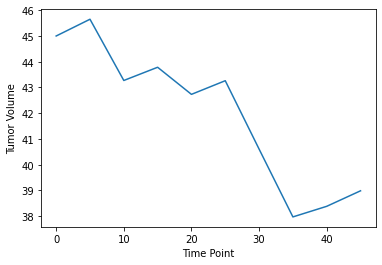

In [60]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plt = merged_data.loc[merged_data["Mouse ID"] == "b128"]
x_time = line_plt["Timepoint"]
y_size = line_plt["Tumor Volume (mm3)"]

# graph and labels
plt.plot(x_time, y_size) 
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
plt.savefig("line plot")
plt.show()

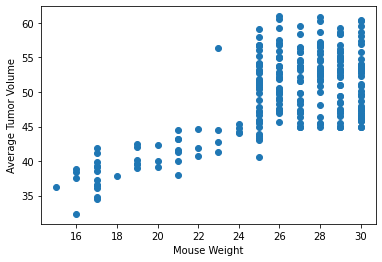

In [65]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plt = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]
scatter_mean = merged_data.groupby(["Mouse ID"]).mean()

# graph and labels
plt.scatter(scatter_mean["Weight (g)"], scatter_mean["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.savefig("scatter plot")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
